# Data Reading

In [1]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('data-project-ml.csv')
data.head(5)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
#change everything to integer
data = data.astype(int)

# Univariate Analysis

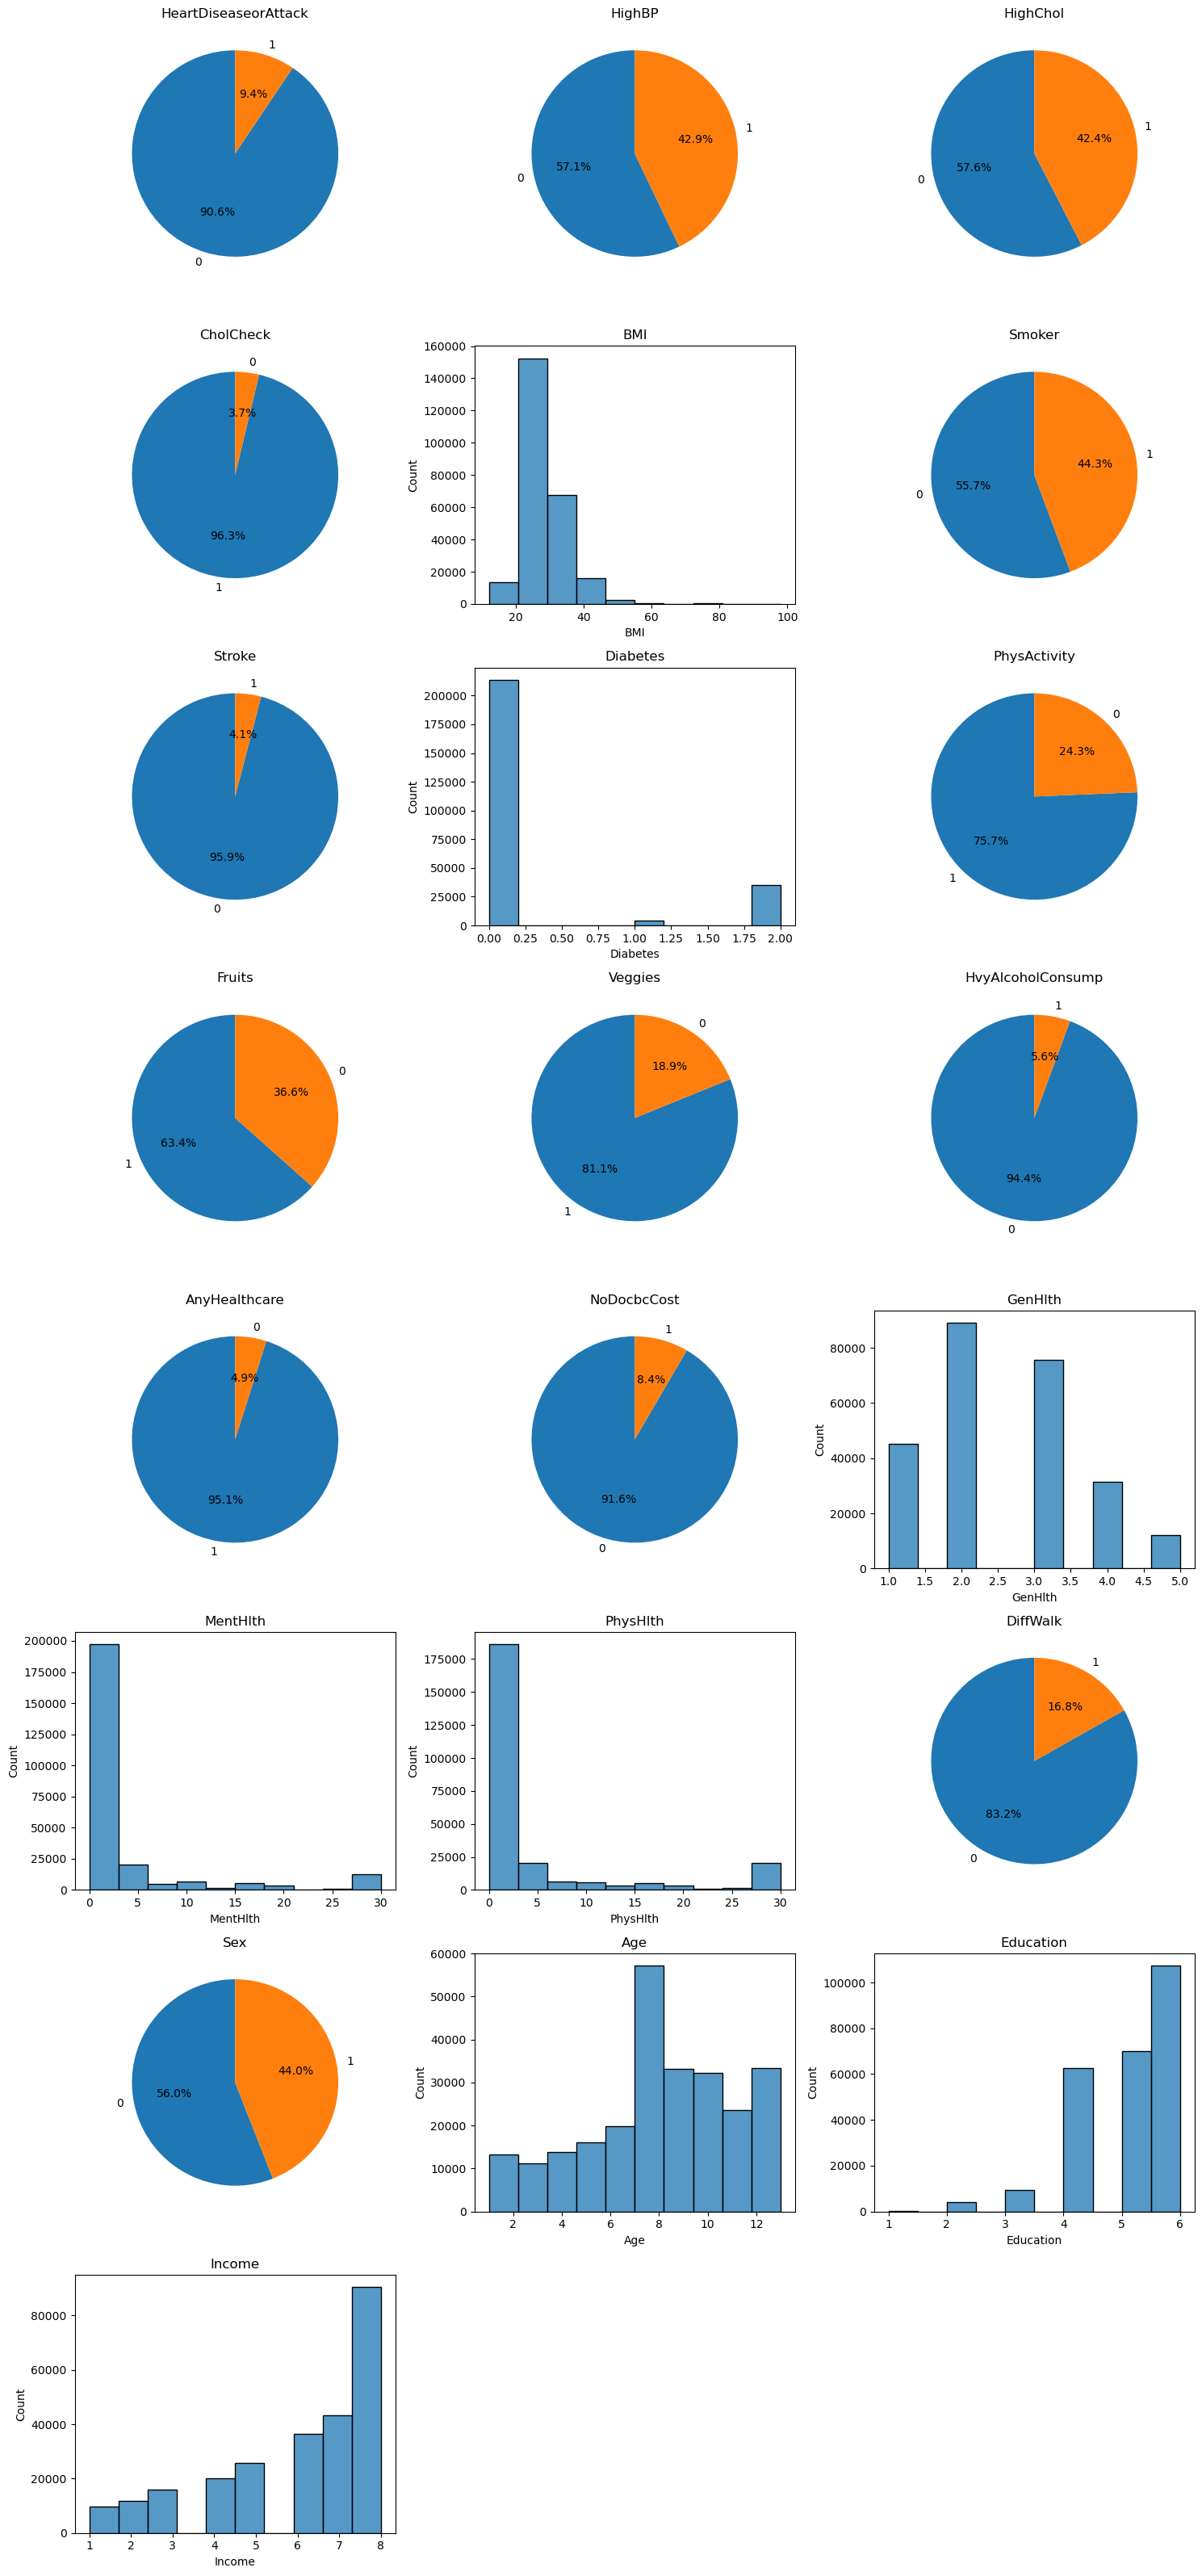

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify binary features
binary_features = [column for column in data.columns if data[column].nunique() == 2 and sorted(data[column].unique()) == [0, 1]]

# Determine the number of rows needed for subplots (with 3 columns)
n_features = len(data.columns)
n_rows = n_features // 3 + (1 if n_features % 3 else 0)

# Create a figure with subplots in 3 columns
fig, axs = plt.subplots(n_rows, 3, figsize=(15, n_rows * 4))
axs = axs.flatten()  # Flatten the array for easy iteration

# Plotting
for i, feature in enumerate(data.columns):
    if feature in binary_features:
        # For binary features, plot a pie chart
        data[feature].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[i], startangle=90)
        axs[i].set_ylabel('')  # Remove the y-label as it's unnecessary for pie charts
    elif data[feature].dtype == 'object':
        # For non-binary categorical data
        sns.countplot(x=feature, data=data, ax=axs[i])
    else:
        # For numerical data
        sns.histplot(data[feature], bins=10, kde=False, ax=axs[i])
    axs[i].set_title(feature)

# Hide any unused axes if the number of features is not a multiple of 3
for i in range(n_features, n_rows * 3):
    if i < len(axs):  # Check if index is within the range of axes
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


xxx

## Binning

### BMI

In [5]:
data['BMI'] = pd.cut(data['BMI'], 
                     bins=[0, 18.5, 25, 30, 35, 40, 100], 
                     labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese', 'Morbidly Obese'])

### MenHlth

In [6]:
# bin to 4 groups
data['MentHlth'] = pd.cut(data['MentHlth'], 
                     bins=[0, 3, 5, 10, 20, 30], 
                     labels=['a', 'b', 'c', 'd', 'e'])

KeyError: 'MenHlth'

### PhysHlth

In [ ]:
# bin to 4 groups
data['PhysHlth'] = pd.cut(data['PhysHlth'], 
                     bins=[0, 3, 5, 10, 20, 30], 
                     labels=['a', 'b', 'c', 'd', 'e'])

# Bivariate Analysis